# Numerical Methods

For a system:

$$ \dot{x} = a - x - \frac{4xy}{1+x^2}$$
$$\dot{y} = bx\left(1-\frac{y}{1+x^2}\right)$$

with the initial conditions, 

$$x(0) = 0$$
$$y(0) = 1$$

which represents the amount of chemical species $x$ and $y$ over time as they react with each other and a third species which has, essentially, a constant amount. 


True values of the parameters $(a,b)$ are $(10,4)$. Measurement error of the data: $\hat{x}(t)$ and  $\hat{y}(t)$. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Plotting parameters
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 
plt.rcParams['font.size'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['lines.linewidth'] = 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Simulation of system from t = 0 to t = 100 to obtain measurement error data using the Runge-Kutta method
T = 100
dt = 0.001
n = int(T/dt)
t = np.linspace(0,T,n)
x0 = 0
y0 = 1

def fx(x,y,t):
    '''
    Input: 
    x: float, value of x at time t
    t: float, value of time
    
    Output:
    fx: float, value of ODE
    '''
    return 10-x-((4*x*y)/(1+(x)**2))


def fy(y,x,t):
    '''
    Input:
    y: float-value of x at time t
    t: float-value of time
    
    Output:
    fy: float-value ODE
    '''
    return 4*x*(1-((y)/(1+(x)**2)))

In [3]:
def RK_stepx(fx, x, fy, y, t, dt):
    '''    
    Input:
    fx: ODE function of x
    fy: ODE function of y
    x: float-last computed value of x(t)
    y: float-last computed value of y(t)
    t: float-last time stamp
    dt: float-time step
    
    Output:
    x_new: float-next computed value of x(t)
    '''
    x_new = x + dt*(fx(x + 0.5*dt*fx(x,y,t), y + 0.5*dt*fy(y,x,t), t + 0.5*dt))
    
    return x_new

def RK_stepy(fy, y, fx, x, t, dt):
    '''    
    Input:
    fx: ODE function of x
    fy: ODE function of y
    x: float-last computed value of x(t)
    y: float-last computed value of y(t)
    t: float-last time stamp
    dt: float-time step
    
    Output:
    y_new: float-next computed value of y(t)
    '''
    y_new = y + dt*(fy(y + 0.5*dt*fy(y,x,t), x + 0.5*dt*fx(x,y,t), t + 0.5*dt))
    
    return y_new

def RK_method(fx,x0,fy,y0,dt,n):
    '''    
    Input:
    fx: ODE function of x
    fy: ODE function of y
    x: float-last computed value of x(t)
    y: float-last computed value of y(t)
    t: float-last time stamp
    dt: float-time step
    n: integer, number of time steps
    
    Output:
    x_array: array, computed values of x(t)
    y_array: array, computed values of y(t)
    
    '''
    
    x_array = [x0]
    y_array = [y0]
    for i in range(1,n):
        t = (i-1)*dt
        x_array.append(RK_stepx(fx,x_array[-1],fy,y_array[-1],t,dt))
        y_array.append(RK_stepy(fy,y_array[-1],fx,x_array[-1],t,dt))
    return (x_array,y_array)


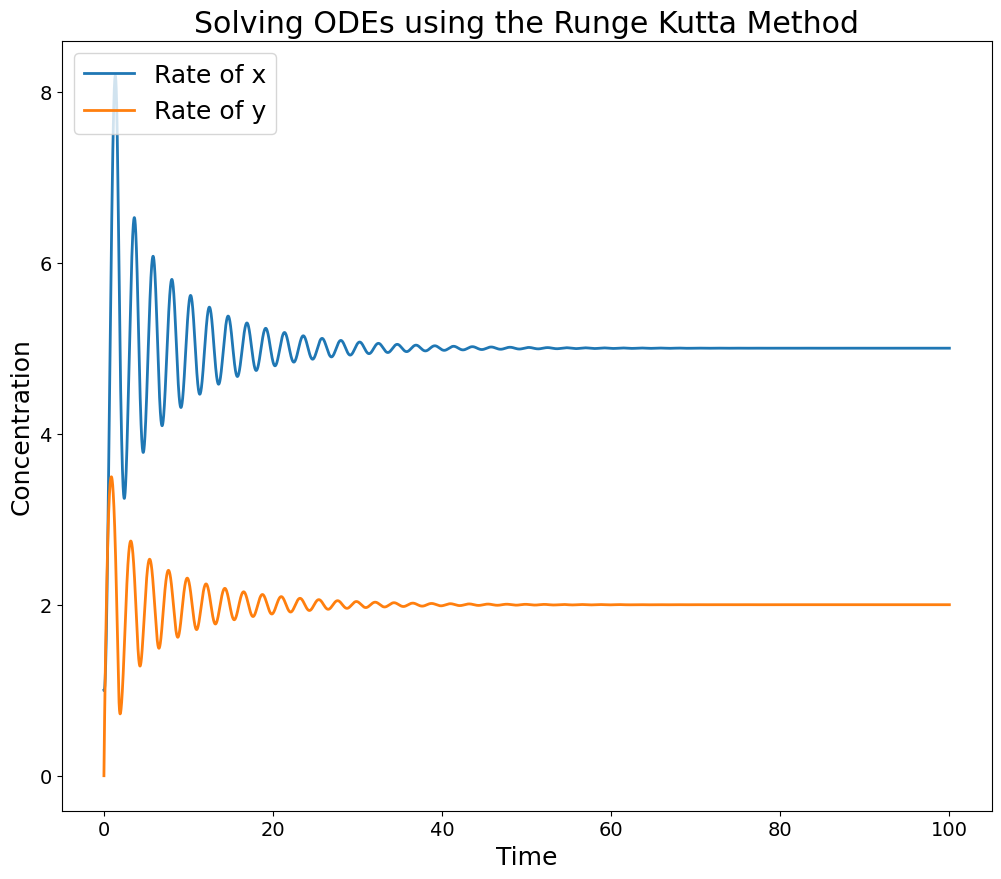

In [4]:
figure(figsize=(12,10))
x_RK = RK_method(fx,x0,fy,y0,dt,n)[0]
y_RK = RK_method(fx,x0,fy,y0,dt,n)[1]
plot(t,y_RK,label = 'Rate of x')
plot(t,x_RK,label = 'Rate of y')
legend(loc='upper left')
xlabel('Time')
ylabel('Concentration')
title('Solving ODEs using the Runge Kutta Method')
show()

In [5]:
#Adding noise in the form of random error - using numpy.random.normal 
#- which draws random samples from a Gaussian distribution centred around 0 with a standard deviation (sigma) = 0.1
# the random noise is added to the simulated x and y measurement errors
sigma = 0.1
def noisex(x, param):
    '''
    Input:
    x: array, computed values of x(t)
    param: parameter
    
    Output:
    x_noise: array, computed values of x(t) with added noise
    '''
    x_noise = x + np.random.normal(0,param,len(x))
    return x_noise
def noisey(y, param):
    '''
    Input:
    y: array, computed values of y(t)
    param: parameter
    
    Output:
    y_noise: array, computed values of y(t) with added noise
    '''
    y_noise = y + np.random.normal(0,param,len(y))
    return y_noise

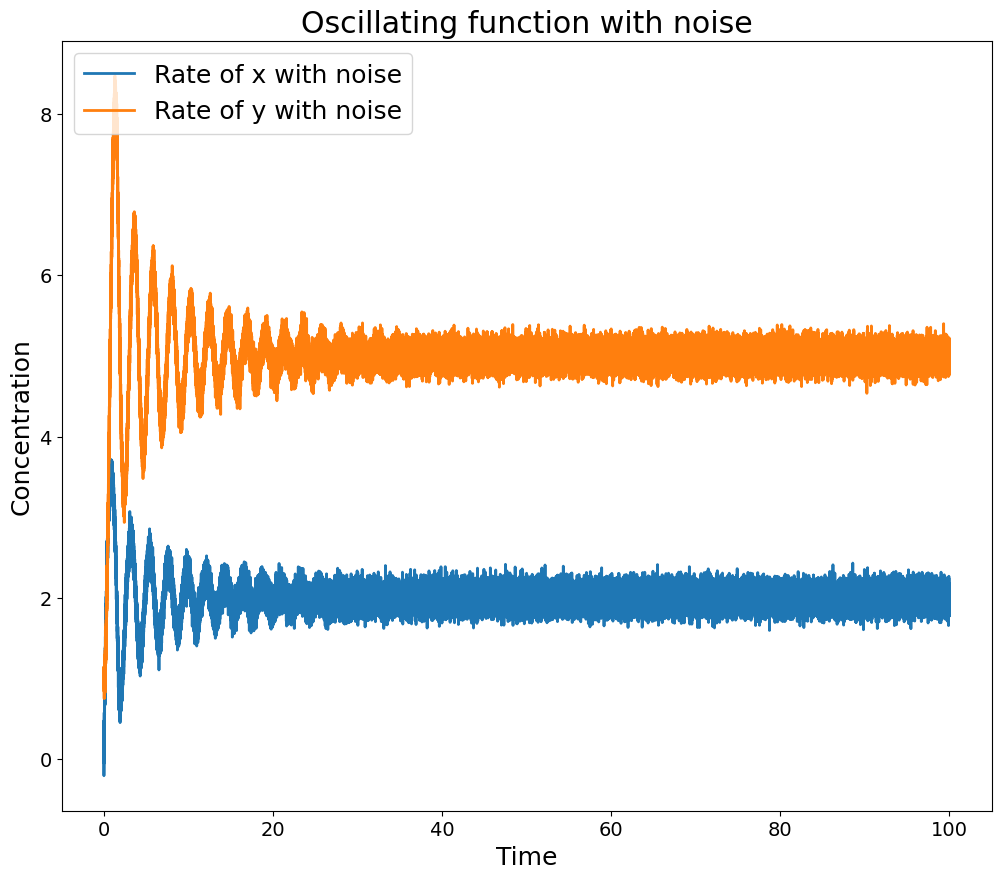

In [6]:
figure(figsize=(12,10))
x_noise = noisex(x_RK,sigma)
y_noise = noisey(y_RK,sigma)
plot(t,x_noise,label = 'Rate of x with noise')
plot(t,y_noise,label = 'Rate of y with noise')
legend(loc='upper left')
xlabel('Time')
ylabel('Concentration')
title('Oscillating function with noise')
show()

In [7]:
# Fitting by setting parameter (a,b) = (10,3) 
# New RK algorithm set for minimising b to optimise x(t) and y(t)
T = 100
dt = 0.001
n = int(T/dt)
t = np.linspace(0,T,n)
x0 = 0
y0 = 1

def fx(x,y,t):
    '''
    Input: 
    x: float, value of x at time t
    t: float, value of time
    
    Output:
    fx: float, value of ODE
    '''
    return 10-x-((4*x*y)/(1+(x)**2))


def fy(y,x,t,b):
    '''
    Input:
    y: float-value of x at time t
    t: float-value of time
    b: float-parameter for y
    
    Output:
    fy: float-value ODE
    '''
    return b*x*(1-((y)/(1+(x)**2)))

def RK_stepx(fx, x, fy, y, t, dt, b):
    '''    
    Input:
    fx: ODE function of x
    fy: ODE function of y
    x: float-last computed value of x(t)
    y: float-last computed value of y(t)
    t: float-last time stamp
    dt: float-time step
    
    Output:
    x_new: float-next computed value of x(t)
    '''
    x_new = x + dt*(fx(x + 0.5*dt*fx(x,y,t), y + 0.5*dt*fy(y,x,t,b), t + 0.5*dt))
    
    return x_new

def RK_stepy(fy, y, fx, x, t, dt, b):
    '''    
    Input:
    fx: ODE function of x
    fy: ODE function of y
    x: float-last computed value of x(t)
    y: float-last computed value of y(t)
    t: float-last time stamp
    dt: float-time step
    
    Output:
    y_new: float-next computed value of y(t)
    '''
    y_new = y + dt*(fy(y + 0.5*dt*fy(y,x,t,b), x + 0.5*dt*fx(x,y,t), t + 0.5*dt,b))
    
    return y_new

def RK_method(fx,x0,fy,y0,dt,n,b):
    '''    
    Input:
    fx: ODE function of x
    fy: ODE function of y
    x: float-last computed value of x(t)
    y: float-last computed value of y(t)
    t: float-last time stamp
    dt: float-time step
    n: integer, number of time steps
    
    Output:
    x_array: array, computed values of x(t)
    y_array: array, computed values of y(t)
    '''
    
    x_array = [x0]
    y_array = [y0]
    for i in range(1,n):
        t = (i-1)*dt
        x_array.append(RK_stepx(fx,x_array[-1],fy,y_array[-1],t,dt,b))
        y_array.append(RK_stepy(fy,y_array[-1],fx,x_array[-1],t,dt,b))
    return (x_array,y_array)

In [8]:
def L2(b):
    '''
    Input:
    b: float-parameter for y 
    
    Output:
    L2sum:  float-error measurement for x and y 
    
    '''
    x_RK_new = RK_method(fx,x0,fy,y0,dt,n,b)[0]
    y_RK_new = RK_method(fx,x0,fy,y0,dt,n,b)[1]
    x_err=[]
    y_err=[]
    zip_x = zip(x_RK_new, x_noise)
    zip_y = zip(y_RK_new, y_noise)
    for ix,nx in zip_x:
        diffx = ((ix-nx)**2)
        x_err.append(diffx)
    for iy,ny in zip_y:
        diffy = ((iy-ny)**2)
        y_err.append(diffy)
    x_comp = (sum(x_err))/n
    y_comp = (sum(y_err))/n
    L2sum = x_comp+y_comp
    return np.float(L2sum)

C:\Users\University account\AppData\Local\Temp\ipykernel_1708\3424272219.py:25: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.float(L2sum)


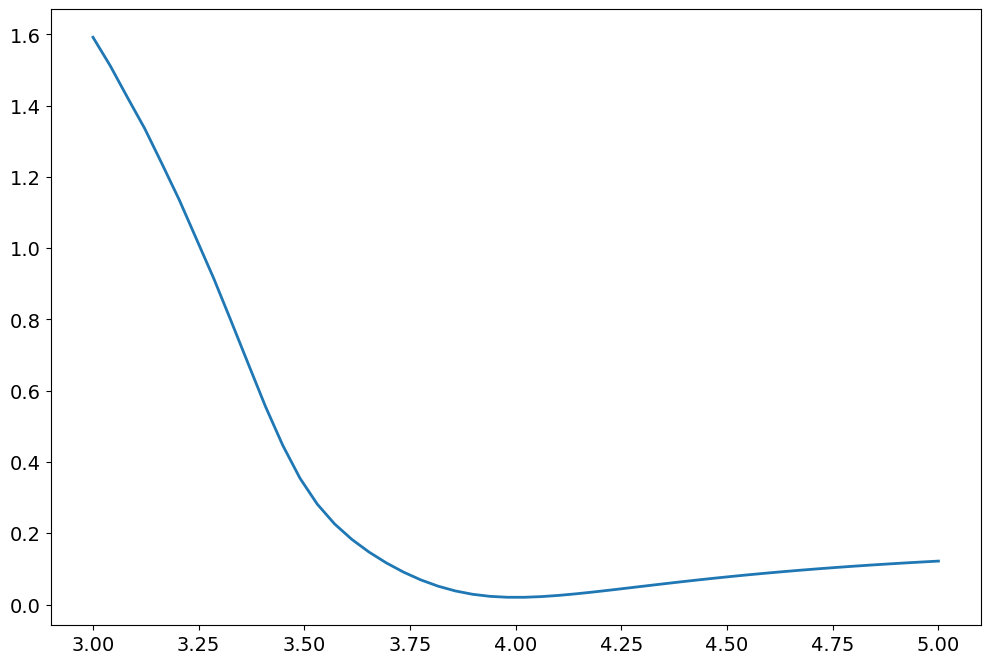

In [9]:
# (the code for the x error performs x_RK_new - x_noise and y_RK_new - y_noise, but since it is squared the code is left as is)
p = len(t)
b_range = np.linspace(3,5)
L2_list = []
for i in b_range:
    L2i = L2(i)
    L2_list.append(L2(i))
plot(b_range,L2_list)

In [11]:
def derivative(b,h):
    '''
    Input:
    b: float - parameter for y 
    h: float - is small deviation that tends to 0
    
    Output:
    deriv: float - derivative of L2 at b based on first principle
    
    '''
    rh = L2(b+h)
    lh = L2(b-h)
    deriv = ((rh - lh))/ (2*h)
    return deriv

In [12]:
h = 1e-6
derivative(3,h)

C:\Users\University account\AppData\Local\Temp\ipykernel_1708\3424272219.py:25: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.float(L2sum)


-2.071403143233397

In [13]:
#test
from scipy.misc import derivative as d
d(L2, 3, dx=1e-6)

C:\Users\University account\AppData\Local\Temp\ipykernel_1708\2207244706.py:3: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d(L2, 3, dx=1e-6)
C:\Users\University account\AppData\Local\Temp\ipykernel_1708\3424272219.py:25: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.float(L2sum)


-2.071403143233397

Since the defined function gives the same value as the pre-defined function imported from scipy, it is assumed to be correct.

In [14]:
def GD_step(f_prime,b,h,step):
    ''' 
    Input
    
    f_prime: function - first derivative 
    b: float - parameter for y
    h: float - is small deviation that tends to 0
    step: float - value of step size
        
    Output
    b_step: float - step value for gradient descent 
    '''    
    b_step = b-step*(f_prime(b,h))
    return b_step


def GD_method(f_prime,b,h,step,n):
    '''
    Input
    f_prime: function - first derivative 
    b: float - parameter for y
    h: float - is small deviation that tends to 0
    step: float - value of step size
    n: integer - number of iterations 
        
    Output
    b_array: array - gradient descent values for n iterations  
    '''        
    #tolerance set to 1e-6 for all cases
    tol = 1e-6
    b_array = [b]
    iteration = n
    i = 0
    
    while abs(f_prime(b_array[-1],h)) > tol and i < n:
        GDstepval = GD_step(f_prime,b_array[-1],h,step)
        b_array.append(GDstepval)
        i += 1
        
    return b_array

In [16]:
#test for b = 3 for 100 iterations (h = 1e-4; step size = 0.1)
h=1e-4
step = 0.1
GD_method(derivative,3,h,step,100)

[3,
 3.2051247061437556,
 3.4687088001800177,
 3.6976041555439574,
 3.7653649869289323,
 3.8160432222225418,
 3.853842574677459,
 3.882223040390238,
 3.9038891967365523,
 3.9207434097353517,
 3.9340824561142416,
 3.944795693827557,
 3.953505446800391,
 3.960657661600376,
 3.966579435397315,
 3.9715158703637132,
 3.975654148108805,
 3.979139615230534,
 3.9820867793250514,
 3.984586992057271,
 3.9867139283167456,
 3.9885275681394994,
 3.9900771411298006,
 3.99140333852667,
 3.992539999333354,
 3.9935154126643924,
 3.9943533358512355,
 3.9950737991089587,
 3.9956937478602845,
 3.996227560102876,
 3.9966874665256786,
 3.997083894157258,
 3.9974257493131113,
 3.997720651935265,
 3.9979751306919535,
 3.9981947861658655,
 3.9983844279143006,
 3.9985481900058564,
 3.998689628727133,
 3.9988118054459707,
 3.9989173570608116,
 3.999008556027267,
 3.999087361601375,
 3.999155463658124,
 3.9992143202153767,
 3.9992651896086646,
 3.9993091581095186,
 3.9993471636557305,
 3.9993800162578603,
 3.9994

The values are converging closer to 4 with each successive iteration implying that the function is minimised when b = 4.

In [16]:
# Sub sampling
x_noises = x_noise[::100]
y_noises = y_noise[::100]
def L2_subsample(b):
    '''
    Input:
    b: float-parameter for y 
    
    Output:
    L2sub:  float-error measurement for x and y 
    
    '''
    x_RK_new = RK_method(fx,x0,fy,y0,dt,n,b)[0]
    y_RK_new = RK_method(fx,x0,fy,y0,dt,n,b)[1]
    x_sub = x_RK_new[::100]
    y_sub = y_RK_new[::100]
    x_err1=[]
    y_err1=[]
    zip_x1 = zip(x_sub.x_noises)
    zip_y1 = zip(y_sub,y_noises)
    for ix,nx in zip_x1:
        diffx1 = ((ix-nx)**2)
        x_err1.append(diffx1)
    for iy,ny in zip_y1:
        diffy1 = ((iy-ny)**2)
        y_err1.append(diffy1)
    
    x_comp_sub = (sum(x_err1))/n
    y_comp_sub = (sum(y_err1))/n
    L2sub = x_comp_sub+y_comp_sub
    return np.float(L2sub)

In [17]:
def derivative_sub(b,h):
    '''
    Input:
    b: float - parameter for y 
    h: float - is small deviation that tends to 0
    
    Output:
    deriv_sub: float - derivative of L2 at b based on first principle
    
    '''
    rh = L2(b+h)
    lh = L2(b-h)
    deriv_sub = ((rh - lh))/ (2*h)
    return deriv_sub

Text(0.5, 1.0, 'x vs y')

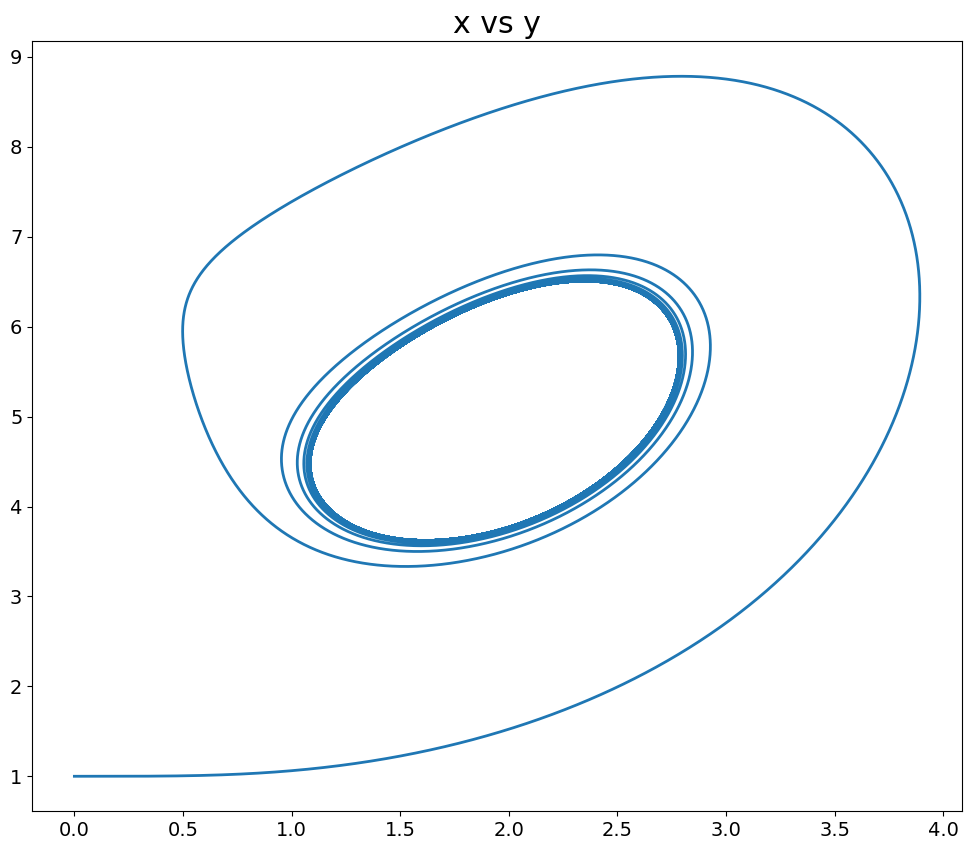

In [18]:
figure(figsize=(12,10))
x_RK_new = RK_method(fx,x0,fy,y0,dt,n,3)[0]
y_RK_new = RK_method(fx,x0,fy,y0,dt,n,3)[1]
plot(x_RK_new,y_RK_new)
title('x vs y')

In [71]:
#Finding the limit cycle
x,y=RK_method(fx,0,fy,1,0.01,15000,3)
for i in range(10,int(500)):
    if abs((x[9999]-x[int(9999+i)])**2-(y[9999]-y[int(9999+i)])**2)<1e-3:
        break
T=i*0.01
print('For b = 3 T =',T,'units t')
        

For b = 3 T = 2.56 units t


In [95]:
# Changing b value to 3.5 and finding the limit cycle
b=np.linspace(2,3.5,10)
T=[]
x,y=RK_method(fx,0,fy,1,0.01,15000,b)
for j in range(0,len(b)):
    for i in range(200,int(500)):
        if abs((x[9999][j]-x[int(9999+i)][j])**2-(y[9999][j]-y[int(9999+i)][j])**2)<7e-4:
            T.append(i*0.01)
            break
    print('For b = ',b[j],' T =',T[j],'units t')
x,y=RK_method(fx,0,fy,1,0.01,15000,3.5)
t=np.linspace(1,150,15000)


For b =  2.0  T = 3.23 units t
For b =  2.1666666666666665  T = 3.08 units t
For b =  2.3333333333333335  T = 2.95 units t
For b =  2.5  T = 2.81 units t
For b =  2.6666666666666665  T = 2.73 units t
For b =  2.833333333333333  T = 2.63 units t
For b =  3.0  T = 2.56 units t
For b =  3.1666666666666665  T = 2.46 units t
For b =  3.333333333333333  T = 2.24 units t
For b =  3.5  T = 2.0 units t
